In [1]:
from pprint import pprint

In [2]:
#This example uses Python 2.7 and the python-request library.

from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'5',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': 'c80185b2-c76f-458d-8b08-8caba829b9c1',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  printable = data
  pprint(printable)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  printable = e
  pprint(printable)

{'data': [{'circulating_supply': 19079550,
           'cmc_rank': 1,
           'date_added': '2013-04-28T00:00:00.000Z',
           'id': 1,
           'last_updated': '2022-06-28T17:42:00.000Z',
           'max_supply': 21000000,
           'name': 'Bitcoin',
           'num_market_pairs': 9589,
           'platform': None,
           'quote': {'USD': {'fully_diluted_market_cap': 433218526820.25,
                             'last_updated': '2022-06-28T17:42:00.000Z',
                             'market_cap': 393600692542.5359,
                             'market_cap_dominance': 42.4603,
                             'percent_change_1h': -0.43042551,
                             'percent_change_24h': -0.4718327,
                             'percent_change_30d': -29.59812809,
                             'percent_change_60d': -46.61738336,
                             'percent_change_7d': -3.01583329,
                             'percent_change_90d': -56.44810584,
                 

In [3]:
type(data)

dict

In [4]:
import pandas as pd

df = pd.json_normalize(data['data'])
df['timestamp'] = pd.to_datetime('now')
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,...,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,9589,2013-04-28T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.0,1.907955e+07,1.907955e+07,...,42.4603,4.332185e+11,None,2022-06-28T17:42:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-06-28 17:44:22.952143
1,1027,Ethereum,ETH,ethereum,5787,2015-08-07T00:00:00.000Z,"[mineable, pow, smart-contracts, ethereum-ecos...",NaN,1.213333e+08,1.213333e+08,...,15.4549,1.432649e+11,None,2022-06-28T17:41:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-06-28 17:44:22.952143
2,825,Tether,USDT,tether,35250,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,6.683492e+10,6.861062e+10,...,7.1967,6.853136e+10,None,2022-06-28T17:41:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2022-06-28 17:44:22.952143
3,3408,USD Coin,USDC,usd-coin,4695,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,5.580261e+10,5.580261e+10,...,6.0210,5.581350e+10,None,2022-06-28T17:41:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2022-06-28 17:44:22.952143
4,1839,BNB,BNB,bnb,981,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",165116760.0,1.632770e+08,1.632770e+08,...,4.1355,3.879524e+10,None,2022-06-28T17:41:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-06-28 17:44:22.952143


In [13]:

def api_runner():
    global df

    from pprint import pprint
    import pandas as pd
    from requests import Request, Session
    from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
    import json
    
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest' 
    parameters = {    
      'start':'1',    
      'limit':'15',    
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': 'c80185b2-c76f-458d-8b08-8caba829b9c1',
    }
    
    session = Session()   
    session.headers.update(headers)
    
    try:
      response = session.get(url, params=parameters) 
      data = json.loads(response.text)    
      printable = data    
    #   pprint(printable)
    
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      printable = e
      pprint(printable)

    df2 = pd.json_normalize(data['data'])
    df2['timestamp'] = pd.to_datetime('now')
    df = df.append(df2)    

    if not os.path.isfile(r'https:\\drive.google.com\drive\u\0\folders\1LoHAIIMVfQYqgFPa-dxFMnUIan3x1_qu\apidata.csv'):
        df.to_csv(r'https:\\drive.google.com\drive\u\0\folders\1LoHAIIMVfQYqgFPa-dxFMnUIan3x1_qu\apidata.csv', header = 'column_names')
    else:
        df.to_csv(r'https:\\drive.google.com\drive\u\0\folders\1LoHAIIMVfQYqgFPa-dxFMnUIan3x1_qu\apidata.csv', mode = 'a', header = False)

In [14]:
import os
from time import time
from time import sleep

In [7]:
for i in range(10):
    api_runner()
    print('API RUM COMPLETED!!')
    sleep(0.5)
# exit()

API RUM COMPLETED!!
API RUM COMPLETED!!
API RUM COMPLETED!!
API RUM COMPLETED!!
API RUM COMPLETED!!
API RUM COMPLETED!!
API RUM COMPLETED!!
API RUM COMPLETED!!
API RUM COMPLETED!!
API RUM COMPLETED!!


In [8]:
df    

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,...,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,9589,2013-04-28T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.0,1.907955e+07,1.907955e+07,...,42.4603,4.332185e+11,None,2022-06-28T17:42:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-06-28 17:44:22.952143
1,1027,Ethereum,ETH,ethereum,5787,2015-08-07T00:00:00.000Z,"[mineable, pow, smart-contracts, ethereum-ecos...",NaN,1.213333e+08,1.213333e+08,...,15.4549,1.432649e+11,None,2022-06-28T17:41:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-06-28 17:44:22.952143
2,825,Tether,USDT,tether,35250,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,6.683492e+10,6.861062e+10,...,7.1967,6.853136e+10,None,2022-06-28T17:41:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2022-06-28 17:44:22.952143
3,3408,USD Coin,USDC,usd-coin,4695,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,5.580261e+10,5.580261e+10,...,6.0210,5.581350e+10,None,2022-06-28T17:41:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2022-06-28 17:44:22.952143
4,1839,BNB,BNB,bnb,981,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",165116760.0,1.632770e+08,1.632770e+08,...,4.1355,3.879524e+10,None,2022-06-28T17:41:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-06-28 17:44:22.952143
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10,6636,Polkadot,DOT,polkadot-new,358,2020-08-19T00:00:00.000Z,"[substrate, polkadot, binance-chain, polkadot-...",NaN,9.875793e+08,1.103303e+09,...,0.8109,8.393852e+09,None,2022-06-28T17:43:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-06-28 17:44:42.855483
11,4943,Dai,DAI,multi-collateral-dai,1013,2019-11-22T00:00:00.000Z,"[defi, stablecoin, ethereum-ecosystem, avalanc...",NaN,6.739048e+09,6.739048e+09,...,0.7267,6.737955e+09,None,2022-06-28T17:43:00.000Z,1027.0,Ethereum,ETH,ethereum,0x6b175474e89094c44da98b954eedeac495271d0f,2022-06-28 17:44:42.855483
12,1958,TRON,TRX,tron,648,2017-09-13T00:00:00.000Z,"[media, payments, tron-ecosystem, bnb-chain]",NaN,9.249446e+10,9.249448e+10,...,0.6617,6.131346e+09,None,2022-06-28T17:42:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-06-28 17:44:42.855483
13,5994,Shiba Inu,SHIB,shiba-inu,369,2020-08-01T00:00:00.000Z,"[memes, ethereum-ecosystem, doggone-doggerel]",NaN,5.490633e+14,5.897350e+14,...,0.6273,6.245255e+09,None,2022-06-28T17:42:00.000Z,1027.0,Ethereum,ETH,ethereum,0x95ad61b0a150d79219dcf64e1e6cc01f0b64c4ce,2022-06-28 17:44:42.855483


In [26]:
import pandas as pd
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [27]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,9589,2013-04-28T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19079550.00000,19079550.00000,NaN,1,None,None,None,2022-06-28T17:42:00.000Z,20629.45366,20406317332.23669,0.91780,-0.43043,-0.47183,-3.01583,-29.59813,-46.61738,-56.44811,393600692542.53589,42.46030,433218526820.25000,None,2022-06-28T17:42:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-06-28 17:44:22.952143
1,1027,Ethereum,ETH,ethereum,5787,2015-08-07T00:00:00.000Z,"[mineable, pow, smart-contracts, ethereum-ecos...",NaN,121333340.87400,121333340.87400,NaN,2,None,None,None,2022-06-28T17:41:00.000Z,1180.75441,13608963979.92753,9.63220,-0.78314,-0.51032,1.74545,-34.60234,-58.32799,-65.27512,143264876831.12582,15.45490,143264876831.13000,None,2022-06-28T17:41:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-06-28 17:44:22.952143
2,825,Tether,USDT,tether,35250,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,66834919366.07514,68610622656.73138,NaN,3,None,None,None,2022-06-28T17:41:00.000Z,0.99884,39281609977.14712,2.38820,-0.01429,-0.02708,-0.02493,-0.01642,-0.13282,-0.15785,66757707041.97684,7.19670,68531358917.31000,None,2022-06-28T17:41:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2022-06-28 17:44:22.952143
3,3408,USD Coin,USDC,usd-coin,4695,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,55802605112.71548,55802605112.71548,NaN,4,None,None,None,2022-06-28T17:41:00.000Z,1.00020,4061587394.54696,2.51970,0.00821,-0.00505,-0.00217,0.01156,0.03657,0.05117,55813500364.83020,6.02100,55813500364.83000,None,2022-06-28T17:41:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2022-06-28 17:44:22.952143
4,1839,BNB,BNB,bnb,981,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",165116760.00000,163276974.63000,163276974.63000,NaN,5,None,None,None,2022-06-28T17:41:00.000Z,234.95641,1017925275.31800,19.35680,-0.43579,0.42250,4.50263,-22.84200,-40.77048,-47.31570,38362972347.11413,4.13550,38795241719.04000,None,2022-06-28T17:41:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-06-28 17:44:22.952143
0,1,Bitcoin,BTC,bitcoin,9589,2013-04-28T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19079550.00000,19079550.00000,NaN,1,NaN,NaN,None,2022-06-28T17:43:00.000Z,20633.37661,20416663772.48622,1.00020,-0.49388,-0.39809,-2.93990,-29.58278,-46.60233,-56.49098,393675540746.99780,42.46830,433300908862.46997,None,2022-06-28T17:43:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-06-28 17:44:28.864834
1,1027,Ethereum,ETH,ethereum,5787,2015-08-07T00:00:00.000Z,"[mineable, pow, smart-contracts, ethereum-ecos...",NaN,121333340.87400,121333340.87400,NaN,2,NaN,NaN,None,2022-06-28T17:43:00.000Z,1180.42325,13602169762.84266,9.57020,-0.89605,-0.48679,1.85173,-34.61827,-58.31491,-65.33696,143224696468.63440,15.45060,143224696468.63000,None,2022-06-28T17:43:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-06-28 17:44:28.864834
2,825,Tether,USDT,tether,35250,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,66834919366.07514,68610622656.73138,NaN,3,NaN,NaN,None,2022-06-28T17:42:00.000Z,0.99884,39289785212.22697,2.41190,-0.01430,-0.02593,-0.02584,-0.01560,-0.13018,-0.15790,66757557823.90279,7.19670,68531205734.73000,None,2022-06-28T17:42:00.000Z,1027.00000,Ethereum,ETH,ether

In [28]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [29]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,9589,2013-04-28T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19079550.00000,19079550.00000,NaN,1,None,None,None,2022-06-28T17:42:00.000Z,20629.45366,20406317332.23669,0.91780,-0.43043,-0.47183,-3.01583,-29.59813,-46.61738,-56.44811,393600692542.53589,42.46030,433218526820.25000,None,2022-06-28T17:42:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-06-28 17:44:22.952143
1,1027,Ethereum,ETH,ethereum,5787,2015-08-07T00:00:00.000Z,"[mineable, pow, smart-contracts, ethereum-ecos...",NaN,121333340.87400,121333340.87400,NaN,2,None,None,None,2022-06-28T17:41:00.000Z,1180.75441,13608963979.92753,9.63220,-0.78314,-0.51032,1.74545,-34.60234,-58.32799,-65.27512,143264876831.12582,15.45490,143264876831.13000,None,2022-06-28T17:41:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-06-28 17:44:22.952143
2,825,Tether,USDT,tether,35250,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,66834919366.07514,68610622656.73138,NaN,3,None,None,None,2022-06-28T17:41:00.000Z,0.99884,39281609977.14712,2.38820,-0.01429,-0.02708,-0.02493,-0.01642,-0.13282,-0.15785,66757707041.97684,7.19670,68531358917.31000,None,2022-06-28T17:41:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2022-06-28 17:44:22.952143
3,3408,USD Coin,USDC,usd-coin,4695,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,55802605112.71548,55802605112.71548,NaN,4,None,None,None,2022-06-28T17:41:00.000Z,1.00020,4061587394.54696,2.51970,0.00821,-0.00505,-0.00217,0.01156,0.03657,0.05117,55813500364.83020,6.02100,55813500364.83000,None,2022-06-28T17:41:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2022-06-28 17:44:22.952143
4,1839,BNB,BNB,bnb,981,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",165116760.00000,163276974.63000,163276974.63000,NaN,5,None,None,None,2022-06-28T17:41:00.000Z,234.95641,1017925275.31800,19.35680,-0.43579,0.42250,4.50263,-22.84200,-40.77048,-47.31570,38362972347.11413,4.13550,38795241719.04000,None,2022-06-28T17:41:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-06-28 17:44:22.952143
0,1,Bitcoin,BTC,bitcoin,9589,2013-04-28T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19079550.00000,19079550.00000,NaN,1,NaN,NaN,None,2022-06-28T17:43:00.000Z,20633.37661,20416663772.48622,1.00020,-0.49388,-0.39809,-2.93990,-29.58278,-46.60233,-56.49098,393675540746.99780,42.46830,433300908862.46997,None,2022-06-28T17:43:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-06-28 17:44:28.864834
1,1027,Ethereum,ETH,ethereum,5787,2015-08-07T00:00:00.000Z,"[mineable, pow, smart-contracts, ethereum-ecos...",NaN,121333340.87400,121333340.87400,NaN,2,NaN,NaN,None,2022-06-28T17:43:00.000Z,1180.42325,13602169762.84266,9.57020,-0.89605,-0.48679,1.85173,-34.61827,-58.31491,-65.33696,143224696468.63440,15.45060,143224696468.63000,None,2022-06-28T17:43:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-06-28 17:44:28.864834
2,825,Tether,USDT,tether,35250,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,66834919366.07514,68610622656.73138,NaN,3,NaN,NaN,None,2022-06-28T17:42:00.000Z,0.99884,39289785212.22697,2.41190,-0.01430,-0.02593,-0.02584,-0.01560,-0.13018,-0.15790,66757557823.90279,7.19670,68531205734.73000,None,2022-06-28T17:42:00.000Z,1027.00000,Ethereum,ETH,ether

In [30]:
df3 = df.groupby('name', sort = False)[['quote.USD.percent_change_1h' , 'quote.USD.percent_change_24h' , 'quote.USD.percent_change_7d' , 'quote.USD.percent_change_30d' , 'quote.USD.percent_change_60d' , 'quote.USD.percent_change_90d']].mean()
df3

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,-0.48811,-0.40480,-2.94681,-29.58417,-46.60370,-56.48708
Ethereum,-0.88579,-0.48893,1.84207,-34.61682,-58.31610,-65.33134
Tether,-0.01430,-0.02603,-0.02575,-0.01568,-0.13042,-0.15789
USD Coin,0.00789,-0.00102,-0.00523,0.01110,0.03933,0.05209
BNB,-0.45749,0.45573,4.54675,-22.84599,-40.75626,-47.32353
Binance USD,0.19420,0.05389,0.23136,0.05038,0.32491,0.10219
XRP,-0.35467,-3.11481,2.82237,-11.81361,-44.20750,-60.55795
Cardano,-0.14158,-1.50122,-3.86585,0.81171,-40.94856,-60.02160
Solana,-1.12459,-5.08905,-3.02293,-18.43956,-61.50877,-70.20671


In [32]:
df4 = df3.stack()
df4

name                                      
Bitcoin       quote.USD.percent_change_1h     -0.48811
              quote.USD.percent_change_24h    -0.40480
              quote.USD.percent_change_7d     -2.94681
              quote.USD.percent_change_30d   -29.58417
              quote.USD.percent_change_60d   -46.60370
              quote.USD.percent_change_90d   -56.48708
Ethereum      quote.USD.percent_change_1h     -0.88579
              quote.USD.percent_change_24h    -0.48893
              quote.USD.percent_change_7d      1.84207
              quote.USD.percent_change_30d   -34.61682
              quote.USD.percent_change_60d   -58.31610
              quote.USD.percent_change_90d   -65.33134
Tether        quote.USD.percent_change_1h     -0.01430
              quote.USD.percent_change_24h    -0.02603
              quote.USD.percent_change_7d     -0.02575
              quote.USD.percent_change_30d    -0.01568
              quote.USD.percent_change_60d    -0.13042
              quote.US

In [36]:
# type(df3)
type(df4)

pandas.core.series.Series

In [37]:
df5 = df4.to_frame(name = 'values')
df5

values
name                                               
Bitcoin      quote.USD.percent_change_1h   -0.48811
             quote.USD.percent_change_24h  -0.40480
             quote.USD.percent_change_7d   -2.94681
             quote.USD.percent_change_30d -29.58417
             quote.USD.percent_change_60d -46.60370
             quote.USD.percent_change_90d -56.48708
Ethereum     quote.USD.percent_change_1h   -0.88579
             quote.USD.percent_change_24h  -0.48893
             quote.USD.percent_change_7d    1.84207
             quote.USD.percent_change_30d -34.61682
             quote.USD.percent_change_60d -58.31610
             quote.USD.percent_change_90d -65.33134
Tether       quote.USD.percent_change_1h   -0.01430
             quote.USD.percent_change_24h  -0.02603
             quote.USD.percent_change_7d   -0.02575
             quote.USD.percent_change_30d  -0.01568
             quote.USD.percent_change_60d  -0.13042
             quote.USD.percent_change_90d  -0.15789
USD Coin     quote.USD.percent_change_1h    0.00789
             quote.USD.percent_change_24h  -0.00102
             quote.USD.percent_change_7d   -0.00523
             quote.USD.percent_change_30d   0.01110
             quote.USD.percent_change_60d   0.03933
             quote.USD.percent_change_90d   0.05209
BNB          quote.USD.percent_change_1h   -0.45749
             quote.USD.percent_change_24h   0.45573
             quote.USD.percent_change_7d    4.54675
             quote.USD.percent_change_30d -22.84599
             quote.USD.percent_change_60d -40.75626
             quote.USD.percent_change_90d -47.32353
Binance USD  quote.USD.percent_change_1h    0.19420
             quote.USD.percent_change_24h   0.05389
             quote.USD.percent_change_7d    0.23136
             quote.USD.percent_change_30d   0.05038
             quote.USD.percent_change_60d   0.32491
             quote.USD.percent_change_90d   0.10219
XRP          quote.USD.percent_change_1h   -0.35467
             quote.USD.percent_change_24h  -3.11481
             quote.USD.percent_change_7d    2.82237
             quote.USD.percent_change_30d -11.81361
             quote.USD.percent_change_60d -44.20750
             quote.USD.percent_change_90d -60.55795
Cardano      quote.USD.percent_change_1h   -0.14158
             quote.USD.percent_change_24h  -1.50122
             quote.USD.percent_change_7d   -3.86585
             quote.USD.percent_change_30d   0.81171
             quote.USD.percent_change_60d -40.94856
             quote.USD.percent_change_90d -60.02160
Solana       quote.USD.percent_change_1h   -1.12459
             quote.USD.percent_change_24h  -5.08905
             quote.USD.percent_change_7d   -3.02293
             quote.USD.percent_change_30d -18.43956
             quote.USD.percent_change_60d -61.50877
             quote.USD.percent_change_90d -70.20671
Dogecoin     quote.USD.percent_change_1h   -0.35859
             quote.USD.percent_change_24h  -4.24303
             quote.USD.percent_change_7d    3.32416
             quote.USD.percent_change_30d -16.32343
             quote.USD.percent_change_60d -50.21044
             quote.USD.percent_change_90d -52.15484
Polkadot     quote.USD.percent_change_1h   -0.06642
             quote.USD.percent_change_24h  -3.23170
             quote.USD.percent_change_7d   -5.30577
             quote.USD.percent_change_30d -22.82904
             quote.USD.percent_change_60d -53.64536
             quote.USD.percent_change_90d -66.72013
Dai          quote.USD.percent_change_1h   -0.07005
             quote.USD.percent_change_24h   0.04260
             quote.USD.percent_change_7d   -0.00602
             quote.USD.percent_change_30d  -0.07279
             quote.USD.percent_change_60d   0.07201
             quote.USD.percent_change_90d   0.00228
TRON         quote.USD.percent_change_1h   -0.12080
             quote.USD.percent_change_24h  -2.18810
             quote.USD.percent_change_7d    0.36308
             quote.USD.percent_change_30d

In [38]:
type(df5)

pandas.core.frame.DataFrame

In [42]:
index = pd.Index(range(90))
df6 = df5.reset_index( )
df6

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,-0.48811
1,Bitcoin,quote.USD.percent_change_24h,-0.40480
2,Bitcoin,quote.USD.percent_change_7d,-2.94681
3,Bitcoin,quote.USD.percent_change_30d,-29.58417
4,Bitcoin,quote.USD.percent_change_60d,-46.60370
5,Bitcoin,quote.USD.percent_change_90d,-56.48708
6,Ethereum,quote.USD.percent_change_1h,-0.88579
7,Ethereum,quote.USD.percent_change_24h,-0.48893
8,Ethereum,quote.USD.percent_change_7d,1.84207
9,Ethereum,quote.USD.percent_change_30d,-34.61682


In [57]:
df7 = df6.rename(columns = {'level_1': 'percent_change'}) 
df7

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,-0.48811
1,Bitcoin,quote.USD.percent_change_24h,-0.40480
2,Bitcoin,quote.USD.percent_change_7d,-2.94681
3,Bitcoin,quote.USD.percent_change_30d,-29.58417
4,Bitcoin,quote.USD.percent_change_60d,-46.60370
5,Bitcoin,quote.USD.percent_change_90d,-56.48708
6,Ethereum,quote.USD.percent_change_1h,-0.88579
7,Ethereum,quote.USD.percent_change_24h,-0.48893
8,Ethereum,quote.USD.percent_change_7d,1.84207
9,Ethereum,quote.USD.percent_change_30d,-34.61682


In [58]:
import seaborn as sns
import matplotlib.pyplot as plt


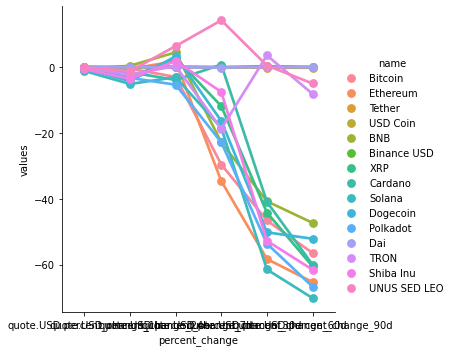

In [59]:
sns.catplot(x = 'percent_change', y = 'values', hue = 'name', data = df7, kind = 'point')

In [60]:
df7['percent_change'] = df7['percent_change'].replace(['quote.USD.percent_change_1h' , 'quote.USD.percent_change_24h' , 'quote.USD.percent_change_7d' , 'quote.USD.percent_change_30d' , 'quote.USD.percent_change_60d' , 'quote.USD.percent_change_90d'],['1h' , '24h' , '7d' , '30d' , '60d' , '90d'])
df7

,name,percent_change,values
0,Bitcoin,1h,-0.48811
1,Bitcoin,24h,-0.40480
2,Bitcoin,7d,-2.94681
3,Bitcoin,30d,-29.58417
4,Bitcoin,60d,-46.60370
5,Bitcoin,90d,-56.48708
6,Ethereum,1h,-0.88579
7,Ethereum,24h,-0.48893
8,Ethereum,7d,1.84207
9,Ethereum,30d,-34.61682


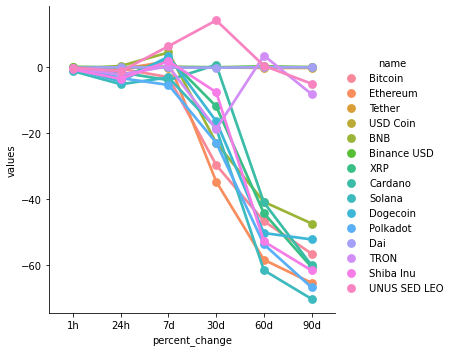

In [61]:
sns.catplot(x = 'percent_change', y = 'values', hue = 'name', data = df7, kind = 'point')

In [68]:
df8 = df[['name' , 'quote.USD.price' , 'timestamp']]
df8 = df8.query("name == 'Bitcoin'")
df8

,name,quote.USD.price,timestamp
0,Bitcoin,20629.45366,2022-06-28 17:44:22.952143
0,Bitcoin,20633.37661,2022-06-28 17:44:28.864834
0,Bitcoin,20633.37661,2022-06-28 17:44:30.136438
0,Bitcoin,20633.37661,2022-06-28 17:44:30.888611
0,Bitcoin,20633.37661,2022-06-28 17:44:31.639367
0,Bitcoin,20633.37661,2022-06-28 17:44:32.389348
0,Bitcoin,20633.37661,2022-06-28 17:44:33.155261
0,Bitcoin,20633.37661,2022-06-28 17:44:34.427831
0,Bitcoin,20633.37661,2022-06-28 17:44:40.232564
0,Bitcoin,20633.37661,2022-06-28 17:44:41.584876


In [ ]:
sns.set_theme(style="darkgrid")

sns.lineplot(x='timestamp', y='quote.USD.price', data = df8)